

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

5) Linear Regression

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm and a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [1]:
import pandas as pd
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [2]:
from scipy.stats import ttest_ind

In [3]:
ttest = ttest_ind(GPU1,GPU2)

In [4]:
ttest.pvalue[0]

0.013794282041452725

In [5]:
# As p-value is less than 5% (1.3%) we will REJECT the 
# null hypothesis that "There is no significant difference between data sets"
# and ACCEPT the Alternate Hypothesis - "There is a significant difference"

## Question 2 

He is trying a third GPU - GPU3.

In [6]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [7]:
ttest = ttest_ind(GPU1,GPU3)
ttest.pvalue[0]

0.14509210993138993

In [8]:
# As p-value is greater than 5% (14.5%) we will ACCEPT the 
# null hypothesis that "There is no significant difference between data sets"
# and REJECT the Alternate Hypothesis - "There is a significant difference"

### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [38]:
import pandas as pd
e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])

#### Answer:

In [54]:
import statsmodels.api as sm
from scipy.stats import levene
from statsmodels.formula.api import ols

In [55]:
levene_test = levene(e1,e2,e3)
levene_test.pvalue[0]

0.12259792666001798

In [56]:
# As p-value (using Levene's test) is greater than 5% (12.2598%) we will ACCEPT the 
# null hypothesis that "There is no significant difference between data sets"

In [80]:
dfs = pd.concat([e1,e2,e3],axis=1)
dfs.columns = ['e1','e2','e3']
dfs

,e1,e2,e3
0,1.59544,1.433800,0.036930
1,1.41973,2.079700,0.938018
2,0.00000,0.892139,0.995956
3,0.00000,2.384740,1.006970


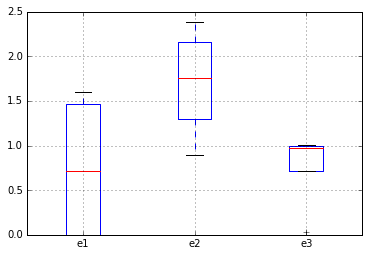

In [84]:
dfs.boxplot()

In [100]:
mod = ols('e1 ~ e2 + e3',data=dfs).fit()

In [101]:
sm.stats.anova_lm(mod, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
e2,1.0,0.011067,0.011067,0.010486,0.935036
e3,1.0,1.221810,1.221810,1.157704,0.476714
Residual,1.0,1.055373,1.055373,NaN,NaN


## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

In [10]:
# TypeI : Type I error occurs when we reject the null hypothesis though it is true 
# TypeII : Type II error occurs when we fail to reject the null hypothesis though 
# it is false and the alternate hypothesis is true

## Question 5 

Explain how the higher confidence value effects TypeI and TypeII error.

#### Answer:


In [11]:
# Generally Hypothesis tests are given with confidence values. Depending on the 
# criticality of the Hypothesis (Its real world implcation), a confidence value
# is set at the begining of the test (So that a tester is not tempted to change 
# the values based on the result of the test).  
#
# probability of committing a Type I error is α
# i.e.       P(Type I) = α
# Also,    Confidence level + α = 1
#
# PART 1:
# As Confidence level goes high, probability of Type I error decreases and as Confidence 
# level goes lower, probability of Type I error increases according to above equation
#
# PART 2:
# As probability of Type I error increases, probability of Type II error decreases and as
# probability of Type I error decreases, probability of Type II error increases.
#
# Thus, as Confidence level goes high, probability of Type II error increases and as  
# Confidence level goes lower, probability of Type II error increases.

## Question 6 

Now we are talking about a different GPU sets. One GPU is new GPU and another is old GPU.

*A computer expert wants to test the null hypothesis that a new GPU is no more effective than the older model.*

Lets consider that he selects the GPU which he think is more effective.

Now, find out which GPU he has selected if he made Type I error. And give reasoning about which is more effective.

**Answer:** 
( It is a subjective question. You dont have to do any calculation or code for it) 
( This question has not relation with the past GPU questions)


In [12]:
# Part 1: Since it was conclusively established (though incorrectly) that the "new GPU are better", the 
#         selected GPU was New GPU
# Part 2: New GPU are no more effective than the Old GPU, as Null Hypothesis is True

## Question 7 

From question6, if he made Type II error.

*Now, find out which GPU he has selected. And give reasoning about which is more effective.*

#### Answer:

In [13]:
# Part 1: Since it WAS NOT conclusively established that the "new GPU are better", the 
#         selected GPU was probably Old GPU
# Part 2: New GPU are more effective than the Old GPU, as Null Hypothesis is False

# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 8 
Read the dataset given in file named 'bigcity.csv'.

In [14]:
import pandas as pd
import numpy as np
import os

os.getcwd()
os.chdir("/Users/vymo/Documents/Projects/GreatLakes/PGP-ML/lab/internal-lab-residency-2-spd-git")

df = pd.read_csv("bigcity.csv")  
df.head(5)

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# Question 9 - Transform the dataset 
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can shape function to get the size of the dataframe


In [15]:
df.shape[0]

49

In [16]:
X = df[['u']]
Y = df[['x']]

In [17]:
X.head(5)

,u
0,138
1,93
2,61
3,179
4,48


In [18]:
Y.head(5)

,x
0,143
1,104
2,69
3,260
4,75


In [19]:
df = df.drop(df.columns[0],axis=1)
df.head(5)

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


## Question 10 - Check the dataset for any missing values and also print out the correlation matrix 

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [20]:
df.dtypes

u    int64
x    int64
dtype: object

In [21]:
df.isna().any()

u    False
x    False
dtype: bool

In [22]:
df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


### The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# Question 11 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20 , random_state=1)

In [24]:
X_train.shape #training set

(39, 1)

In [25]:
X_test.shape #test set

(10, 1)

# Question 12 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [26]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
#b1 value
b1 = regression_model.coef_[0][0]
b1

1.1594512342174779

In [28]:
#b0 value
b0 = regression_model.intercept_[0]
b0

9.718455322828262

# Question 13 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

In [29]:
%matplotlib inline 
import matplotlib.pyplot as plt  
import matplotlib.style
plt.style.use('classic')

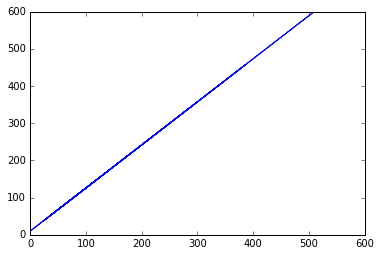

In [30]:
y_vals = b0 + b1 * X_train
plt.plot(X_train, y_vals)

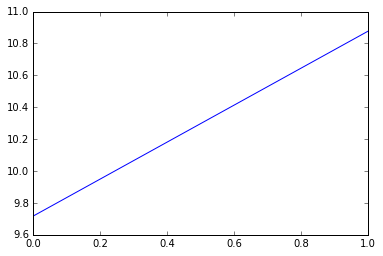

In [31]:
#In range 0 - 1
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = b0 + b1 * x_vals
plt.plot(x_vals, y_vals)

# Question 14 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
import math

In [34]:
RMSE = math.sqrt(mean_squared_error(y_test,regression_model.predict(X_test)))
RMSE

23.385235190249123

In [35]:
R2 = r2_score(y_test,regression_model.predict(X_test))
R2

0.9181922560396981

## Question 15 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [36]:
regression_model.score(X_train, y_train)

0.9682175540860046

In [37]:
regression_model.score(X_test, y_test)

0.9181922560396981